In [24]:
import pandas as pd
from pandas import *
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader

In [4]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,114.520712,115.472885,113.435771,114.425059,5.219562e+07,113.621784
std,12.462903,12.464488,12.339581,12.387996,2.031549e+07,12.836765
min,93.620003,94.739998,92.570000,93.089996,1.447960e+07,91.484632
25%,101.589996,102.379997,100.699997,101.580002,3.891590e+07,100.324778
50%,114.099998,115.690002,113.050003,114.180000,4.775780e+07,113.258065
75%,126.989998,127.620003,125.769997,126.690002,6.049020e+07,126.382098
max,134.460007,134.539993,131.399994,133.000000,1.898463e+08,132.539993


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-07-09 00:00:00 to 2015-07-09 00:00:00
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


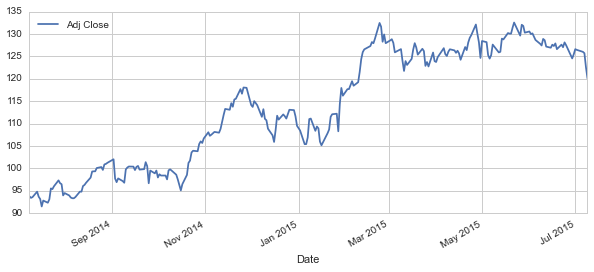

In [19]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

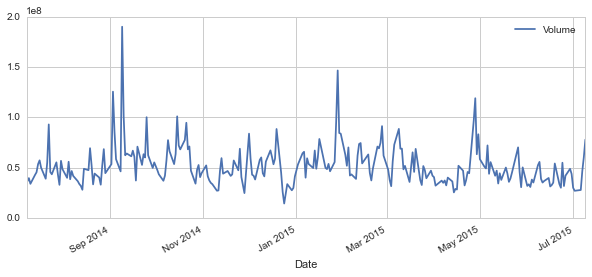

In [20]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [31]:
#Moving Average
ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    

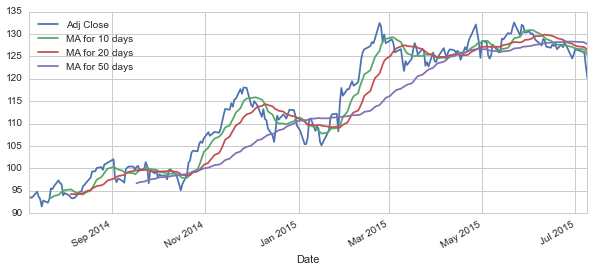

In [32]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

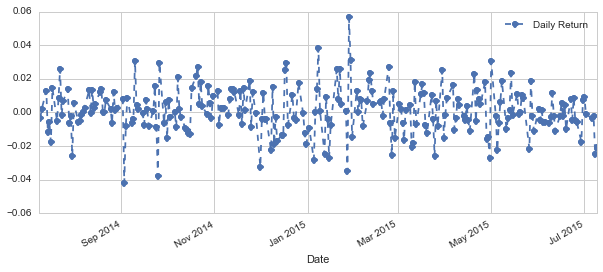

In [33]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')


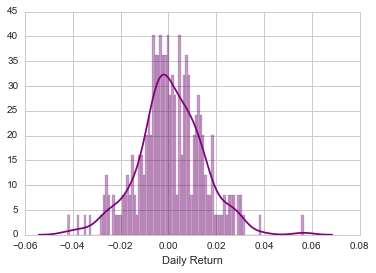

In [34]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

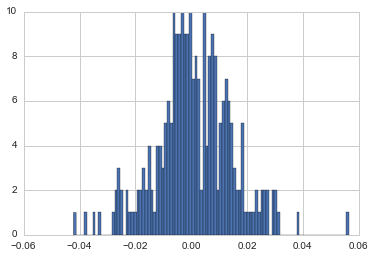

In [35]:
AAPL['Daily Return'].hist(bins=100)

In [38]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [39]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-07-09,93.744971,329.970001,576.082652,40.597165
2014-07-10,93.401008,327.920013,571.102563,40.616651
2014-07-11,93.577904,346.200012,579.182645,41.006354
2014-07-14,94.786689,355.320007,584.872627,41.055066
2014-07-15,93.676178,354.440002,584.782659,41.357086


In [40]:
tech_rets = closing_df.pct_change()

In [41]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-07-09,NaN,NaN,NaN,NaN
2014-07-10,-0.003669,-0.006213,-0.008645,0.000480
2014-07-11,0.001894,0.055745,0.014148,0.009595
2014-07-14,0.012917,0.026343,0.009824,0.001188
2014-07-15,-0.011716,-0.002477,-0.000154,0.007356


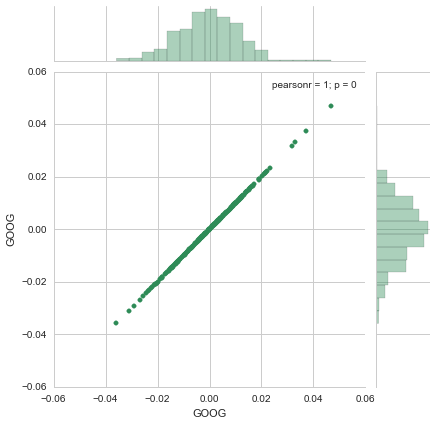

In [42]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

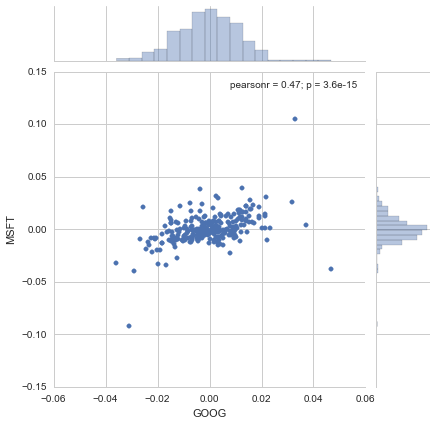

In [43]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [44]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-07-09,NaN,NaN,NaN,NaN
2014-07-10,-0.003669,-0.006213,-0.008645,0.000480
2014-07-11,0.001894,0.055745,0.014148,0.009595
2014-07-14,0.012917,0.026343,0.009824,0.001188
2014-07-15,-0.011716,-0.002477,-0.000154,0.007356


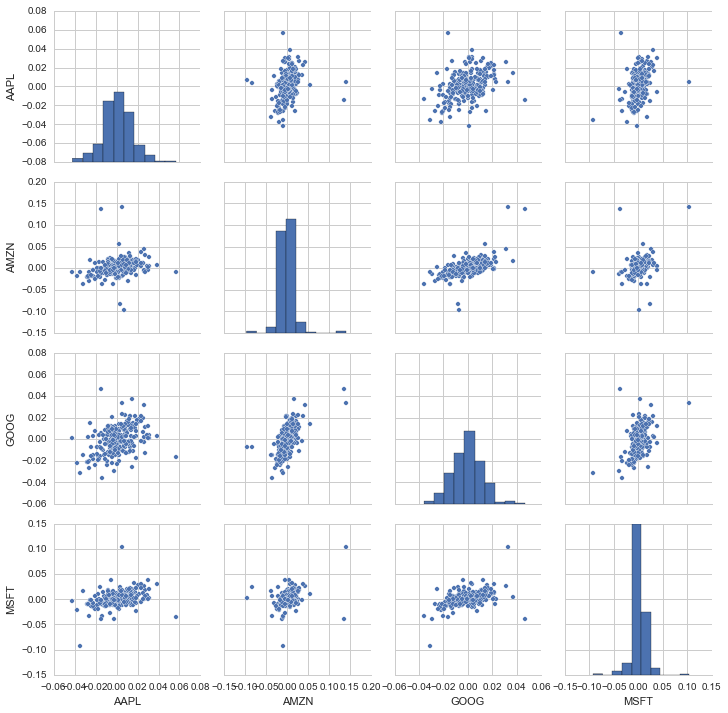

In [45]:
sns.pairplot(tech_rets.dropna())

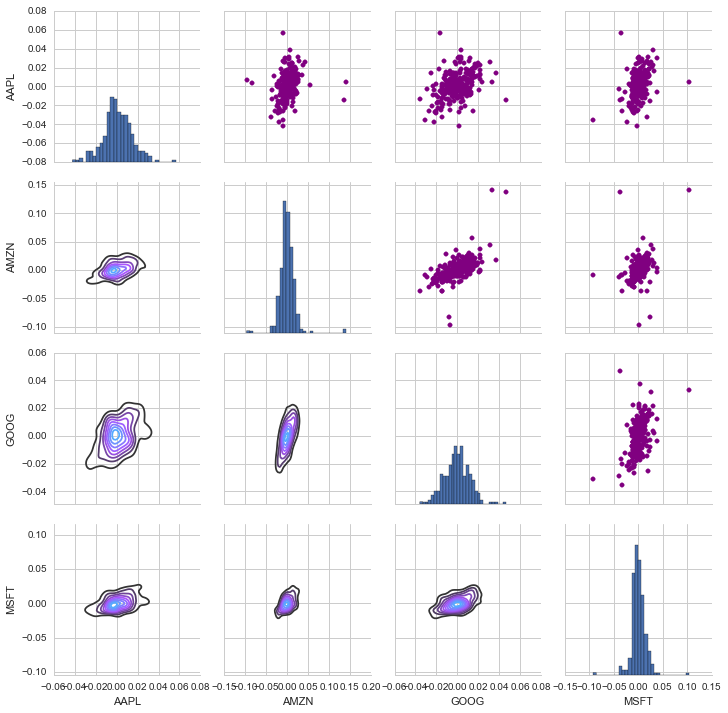

In [46]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

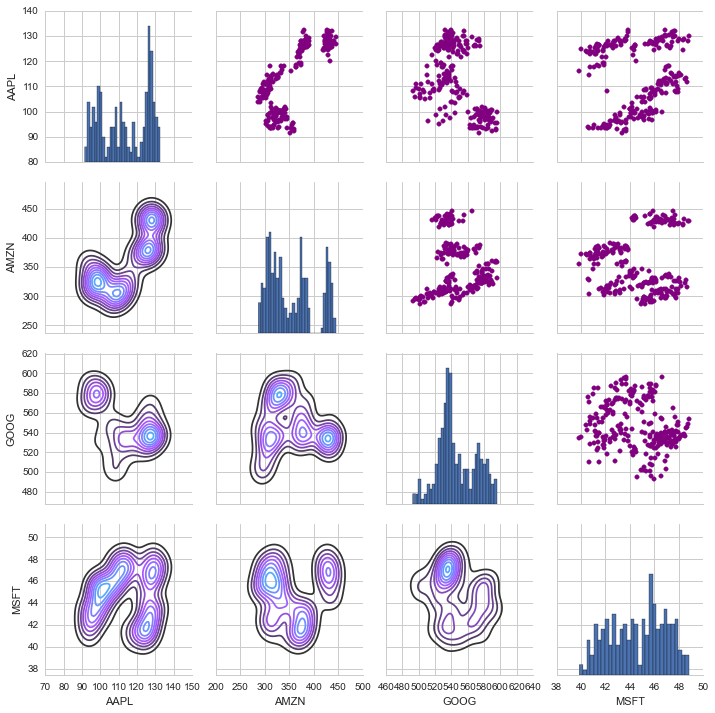

In [47]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

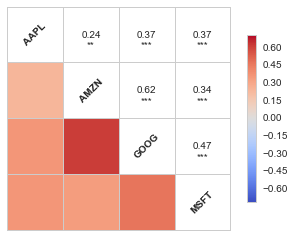

In [50]:
sns.corrplot(tech_rets.dropna(),annot=True)

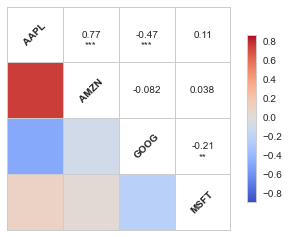

In [51]:
sns.corrplot(closing_df,annot=True)

In [52]:
rets = tech_rets.dropna()

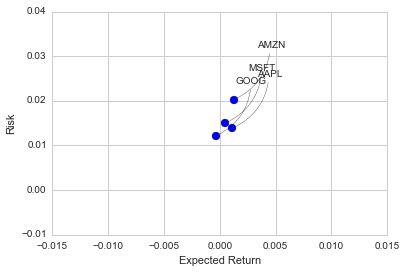

In [60]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

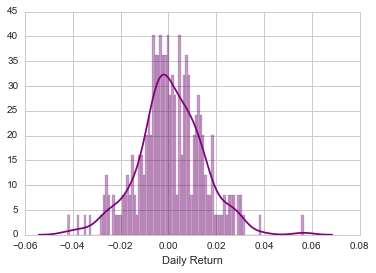

In [62]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [63]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-07-10,-0.003669,-0.006213,-0.008645,0.000480
2014-07-11,0.001894,0.055745,0.014148,0.009595
2014-07-14,0.012917,0.026343,0.009824,0.001188
2014-07-15,-0.011716,-0.002477,-0.000154,0.007356
2014-07-16,-0.005665,0.004119,-0.003625,0.038398


In [64]:
rets['AAPL'].quantile(0.05)

-0.022567044248030965

In [65]:
#value at risk using Monte Carlo method

days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [66]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [67]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-09,571.582578,576.722590,569.378536,576.082652,1116800,576.082652
2014-07-10,565.912548,576.592656,565.012558,571.102563,1356700,571.102563
2014-07-11,571.912585,580.852630,571.422594,579.182645,1621700,579.182645
2014-07-14,582.602608,585.212671,578.032641,584.872627,1854100,584.872627
2014-07-15,585.742628,585.807626,576.562606,584.782659,1623000,584.782659


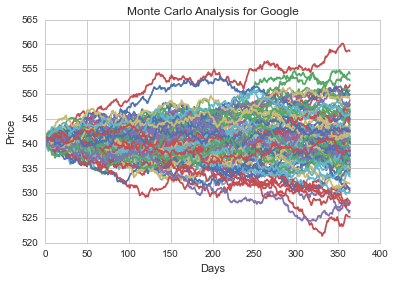

In [68]:
start_price = 540.74

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
             
             

In [70]:
runs = 1000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

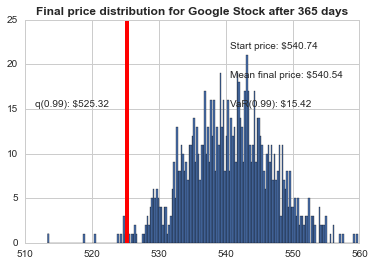

In [75]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#Starting Price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

#Mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price -q,))

#Display 1% qunatile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" %
          days, weight='bold');